In [54]:
from graph_traffic.merge_data import merge_data
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

id_t = 1006
target = "intensidad"

df = merge_data(id_t)
df

C:\Users\Bened\PycharmProjects\madrid-traffic\graph_traffic\graph_traffic\merge_data.py:57: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df["week"] = df.date.dt.week


,date,id,intensidad,ocupacion,vmed,temperatura,humedad_relativa,presion_barometrica,radiacion_solar,precipitacion,...,day_of_month,day_type,week_day,bank_holiday,working_day,school_holiday,hour,minute,windx,windy
0,2019-01-01 00:00:00,1006.0,264.0,1.0,70.0,NaN,NaN,NaN,NaN,NaN,...,1,mon-fri,1,True,False,True,0.00,0,NaN,NaN
1,2019-01-01 00:15:00,1006.0,252.0,1.0,70.0,NaN,NaN,NaN,NaN,NaN,...,1,mon-fri,1,True,False,True,0.25,15,NaN,NaN
2,2019-01-01 00:30:00,1006.0,276.0,1.0,66.0,NaN,NaN,NaN,NaN,NaN,...,1,mon-fri,1,True,False,True,0.50,30,NaN,NaN
3,2019-01-01 00:45:00,1006.0,1056.0,3.0,72.0,NaN,NaN,NaN,NaN,NaN,...,1,mon-fri,1,True,False,True,0.75,45,NaN,NaN
4,2019-01-01 01:00:00,1006.0,1560.0,4.0,70.0,-0.40,85.00,957.00,1.0,0.0,...,1,mon-fri,1,True,False,True,1.00,0,0.547038,0.221018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70076,2020-12-30 23:00:00,1006.0,900.0,3.0,72.0,2.60,73.00,947.00,1.0,0.0,...,30,mon-fri,2,False,True,True,23.00,0,-0.588156,-0.225772
70077,2020-12-30 23:15:00,1006.0,696.0,2.0,68.0,2.35,74.25,947.25,1.0,0.0,...,30,mon-fri,2,False,True,True,23.25,15,-0.572393,-0.371716
70078,2020-12-30 23:30:00,1006.0,456.0,2.0,65.0,2.10,75.50,947.50,1.0,0.0,...,30,mon-fri,2,False,True,True,23.50,30,-0.519723,-0.519723
70079,2020-12-30 23:45:00,1006.0,624.0,1.0,66.0,1.85,76.75,947.75,1.0,0.0,...,30,mon-fri,2,False,True,True,23.75,45,-0.428903,-0.660453


## Traffic along the week

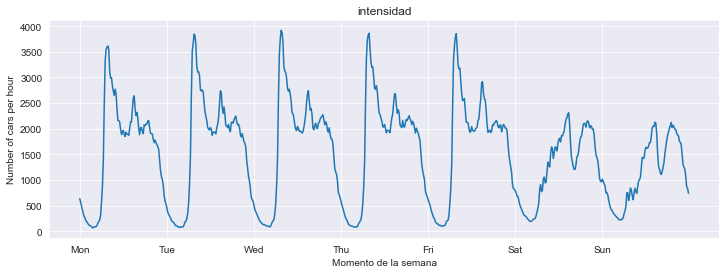

In [55]:
fig, ax = plt.subplots(figsize=(12, 4))
titles = {
    "intensidad": "Number of cars per hour",
    "ocupacion": "Percentage of the time the road is busy",
    "vmed": "Average speed (Km/h)"
}
df.groupby(["week_day", "hour"]).mean()[target].plot(ax=ax)
_ = ax.set(
    title=target,
    xticks=[i * 4* 24 for i in range(7)],
    xticklabels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"],
    xlabel="Momento de la semana",
    ylabel=titles[target],
)

## Average traffic in a working day (Monday-Friday)

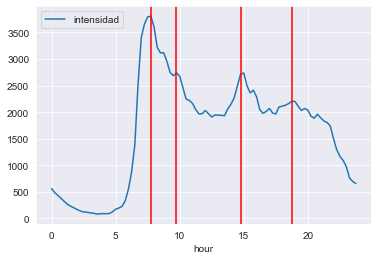

In [56]:
df[df.week_day<=4].groupby("hour").agg({"intensidad": "mean"}).plot()
plt.axvline(7.75, c="red") # 7:45
plt.axvline(9.75, c="red") # 9:45
plt.axvline(14.75, c="red") # 14:45
plt.axvline(18.75, c="red") # 18:45
plt.show()

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70081 entries, 0 to 70080
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 70081 non-null  datetime64[ns]
 1   id                   58824 non-null  float64       
 2   intensidad           54837 non-null  float64       
 3   ocupacion            45902 non-null  float64       
 4   vmed                 54354 non-null  float64       
 5   temperatura          58043 non-null  float64       
 6   humedad_relativa     56940 non-null  float64       
 7   presion_barometrica  58062 non-null  float64       
 8   radiacion_solar      58106 non-null  float64       
 9   precipitacion        56669 non-null  float64       
 10  dir_viento           58087 non-null  float64       
 11  velocidad_viento     58062 non-null  float64       
 12  year                 70081 non-null  int64         
 13  season               70081 non-

## Focus on the target

In [58]:
tmagns = ['intensidad', 'ocupacion', 'vmed']
for m in tmagns:
    if m != target:
        del df[m]
df = df.dropna().reset_index(drop=True)

In [59]:
df[target].max()

7380.0

## Distribution of the target variable

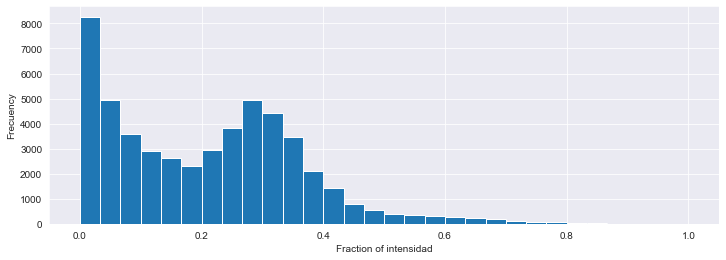

In [60]:
y = df[target] / df[target].max()

fig, ax = plt.subplots(figsize=(12, 4))
y.hist(bins=30, ax=ax)
_ = ax.set(
    xlabel=f"Fraction of {target}",
    ylabel="Frecuency",
)

## Seasonal time plots

<AxesSubplot:xlabel='week', ylabel='intensidad'>

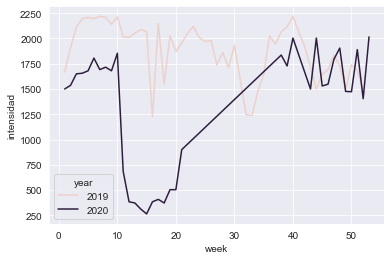

In [61]:
by = "week"
dfm = df.groupby([by, "year"]).agg({"intensidad": "median"}).reset_index()
sns.lineplot(data=dfm, x="week", y="intensidad", hue="year")

<AxesSubplot:xlabel='month', ylabel='intensidad'>

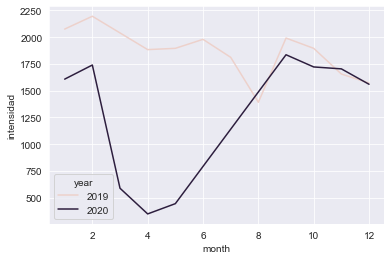

In [62]:
by = "month"
dfm = df.groupby([by, "year"]).agg({"intensidad": "median"}).reset_index()
sns.lineplot(data=dfm, x=by, y="intensidad", hue="year")

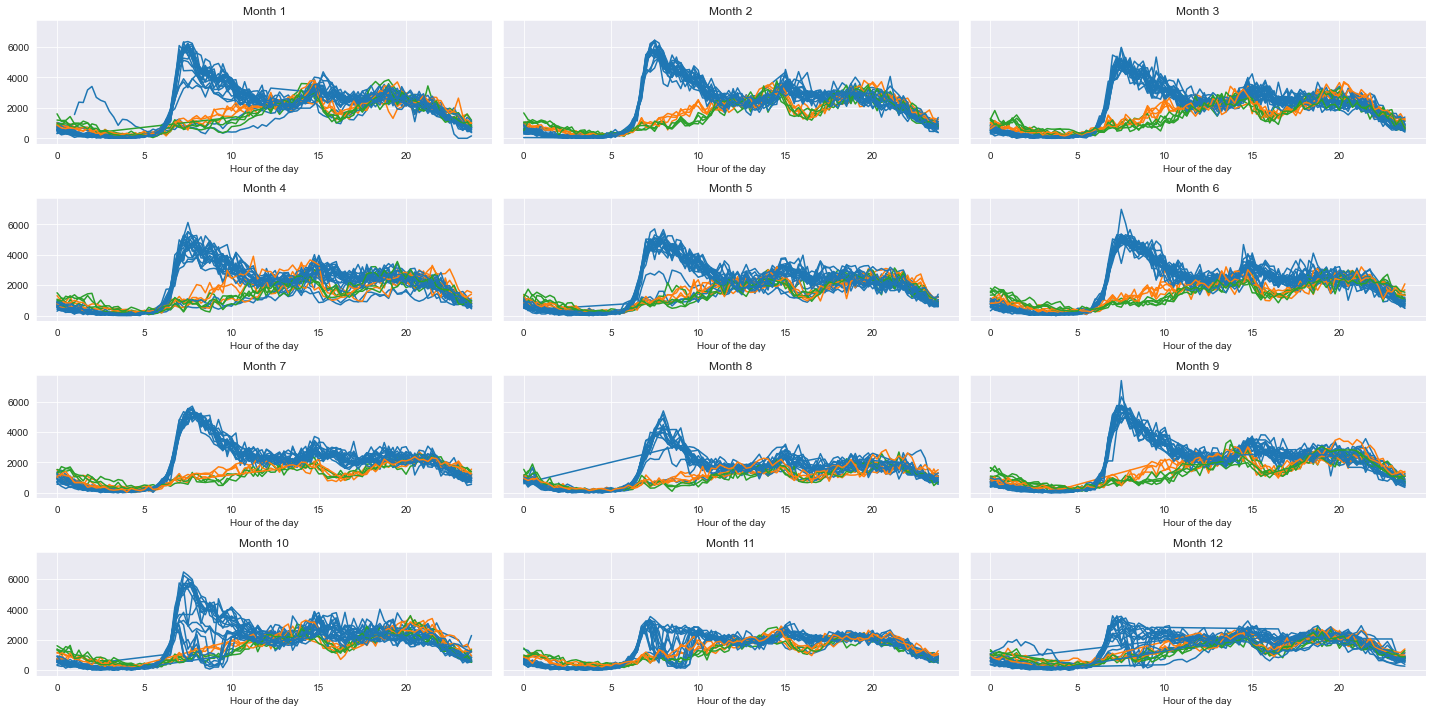

In [74]:
year = 2019

fig, axs = plt.subplots(4, 3, figsize=(20, 10), sharey=True)

dict_colors = {
    'mon-fri': 'tab:blue',
    'sat': 'tab:orange',
    'sun': 'tab:green'
}
for month in range(1, 13):

    line = (month-1) // 3
    column = (month-1) % 3
    ax = axs[line][column]

    dfm = df[(df.month == month) & (df.year==year)]

    days = dfm.day_of_month.unique()

    for d in days:
        dff = dfm[dfm.day_of_month == d]
        color = dict_colors[dff.day_type.values[0]]
        ax.plot(dff.hour, dff.intensidad, color=color)
    ax.set_title(f"Month {month}")
    ax.set_xlabel("Hour of the day")

plt.suptitle(f"Year {year}")
fig.tight_layout()

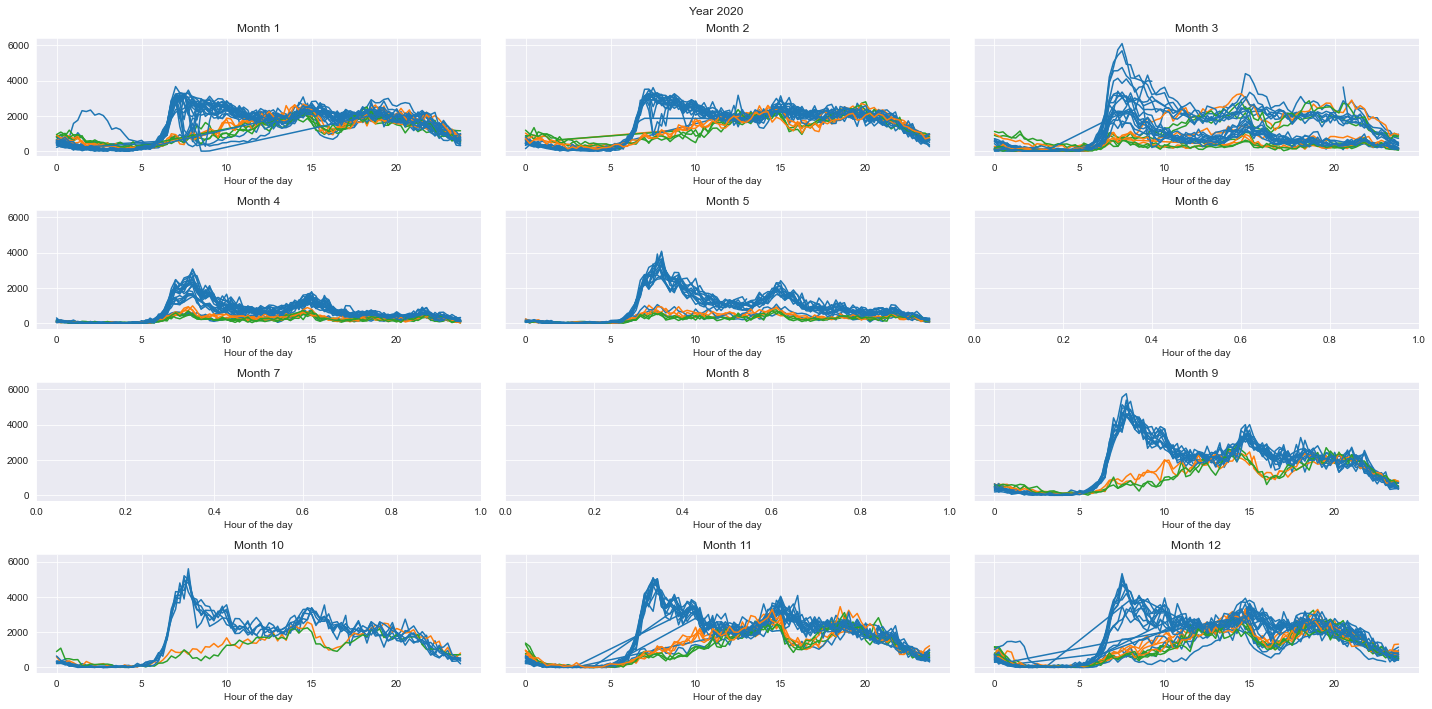

In [75]:
year = 2020

fig, axs = plt.subplots(4, 3, figsize=(20, 10), sharey=True)

dict_colors = {
    'mon-fri': 'tab:blue',
    'sat': 'tab:orange',
    'sun': 'tab:green'
}
for month in range(1, 13):

    line = (month-1) // 3
    column = (month-1) % 3
    ax = axs[line][column]

    dfm = df[(df.month == month) & (df.year==year)]

    days = dfm.day_of_month.unique()

    for d in days:
        dff = dfm[dfm.day_of_month == d]
        color = dict_colors[dff.day_type.values[0]]
        ax.plot(dff.hour, dff.intensidad, color=color)
    ax.set_title(f"Month {month}")
    ax.set_xlabel("Hour of the day")

plt.suptitle(f"Year {year}")
fig.tight_layout()

## Correlation between variables

<AxesSubplot:>

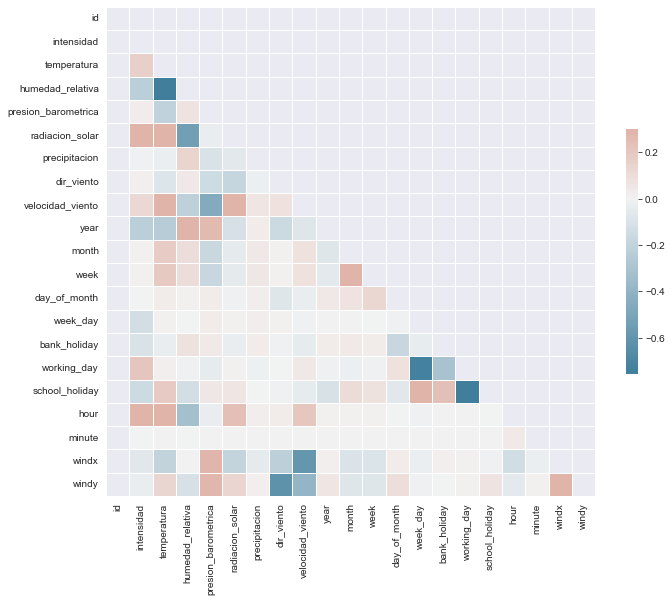

In [63]:
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})